## Configuracion del ambiente de trabajo

Importar los modulos de Python a utilizar

In [102]:
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Carga de datos


In [103]:
data = pd.read_csv("./data/airbnb-listings-extract.csv", sep=';', on_bad_lines='skip')
print(data.shape)
data.head(5).T

(14780, 89)


0  \
ID                                                                       11210388   
Listing Url                                 https://www.airbnb.com/rooms/11210388   
Scrape ID                                                          20170306202425   
Last Scraped                                                           2017-03-07   
Name                                               The Loft-Full Bath-Deck w/View   
Summary                         Loft in the Hill country 12-15 minutes directl...   
Space                           This loft has a spectacular view of the hills ...   
Description                     Loft in the Hill country 12-15 minutes directl...   
Experiences Offered                                                          none   
Neighborhood Overview           This neighborhood is located in the hills west...   
Notes                           The loft is located on a gated property.  Ther...   
Transit                         There is no public transportation from this lo...   
Access                          The loft is entirely private to the guest as i...   
Interaction                     My wife and I live on the property so we would...   
House Rules                     The loft is entirely private but is adjacent t...   
Thumbnail Url                   https://a0.muscache.com/im/pictures/c351a9b5-5...   
Medium Url                      https://a0.muscache.com/im/pictures/c351a9b5-5...   
Picture Url                     https://public.opendatasoft.com/api/v2/catalog...   
XL Picture Url                  https://a0.muscache.com/im/pictures/c351a9b5-5...   
Host ID                                                                  58386783   
Host URL                               https://www.airbnb.com/users/show/58386783   
Host Name                                                                    John   
Host Since                                                             2016-02-11   
Host Location                   My father was USAF so I was born at Offutt AFB...   
Host About                      I am a High Tech Professional with over 30 yea...   
Host Response Time                                                 within an hour   
Host Response Rate                                                          100.0   
Host Acceptance Rate                                                          NaN   
Host Thumbnail Url              https://a0.muscache.com/im/pictures/c5c78f08-f...   
Host Picture Url                https://a0.muscache.com/im/pictures/c5c78f08-f...   
Host Neighbourhood                                                            NaN   
Host Listings Count                                                           1.0   
Host Total Listings Count                                                     1.0   
Host Verifications                                        email,phone,reviews,kba   
Street                          Canyon Edge Drive, Austin, TX 78733, United St...   
Neighbourhood                                                                 NaN   
Neighbourhood Cleansed                                                      78733   
Neighbourhood Group Cleansed                                                  NaN   
City                                                                       Austin   
State                                                                          TX   
Zipcode                                                                     78733   
Market                                                                     Austin   
Smart Location                                                         Austin, TX   
Country Code                                                                   US   
Country                                                             United States   
Latitude                                                                30.337361   
Longitude                                                              -97.863277   


## Preparación de datos
### División train/test



In [104]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos los datos en sus respectivos archivos
train.to_csv('./data/data_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/data_test.csv', sep=';', decimal='.', index=False)


Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


### Carga del dataset de train 



In [77]:
train_data = pd.read_csv('./data/data_train.csv', sep=';', decimal='.')
test_data = pd.read_csv('./data/data_test.csv', sep=';', decimal='.')

# Dataset de train
data_train = train_data.values
y_train = data_train[:,0:1]     
X_train = data_train[:,1:]      

# Dataset de test
data_test = test_data.values
y_test = data_test[:,0:1]     
X_test = data_test[:,1:]

## Análisis exploratorio
### Head

In [78]:
# Head
train_data.head(5).T


0  \
ID                                                                        5994463   
Listing Url                                  https://www.airbnb.com/rooms/5994463   
Scrape ID                                                          20170407214119   
Last Scraped                                                           2017-04-08   
Name                                             PISO ATOCHA- FLAT NEAR ATOCHA  .   
Summary                         Piso recién reformado cómoda habitación con ba...   
Space                           Un piso muy cómodo en Jerónimos, una de las zo...   
Description                     Piso recién reformado cómoda habitación con ba...   
Experiences Offered                                                          none   
Neighborhood Overview           El barrio de Jeronimos es un enclave tranquilo...   
Notes                           Facilitamos guía de eventos y rutas turísticas...   
Transit                         Excelente ubicación a tan solo 5 minutos andan...   
Access                          La conexión a internet por fibra óptica 100 MB...   
Interaction                     Recibimos personalmente a nuestros huéspedes y...   
House Rules                     El apartamento se encuentra en un edificio res...   
Thumbnail Url                   https://a0.muscache.com/im/pictures/74652419/f...   
Medium Url                      https://a0.muscache.com/im/pictures/74652419/f...   
Picture Url                     https://public.opendatasoft.com/api/v2/catalog...   
XL Picture Url                  https://a0.muscache.com/im/pictures/74652419/f...   
Host ID                                                                  31124866   
Host URL                               https://www.airbnb.com/users/show/31124866   
Host Name                                                                   Inava   
Host Since                                                             2015-04-13   
Host Location                           Arroyomolinos, Comunidad de Madrid, Spain   
Host About                                                                    NaN   
Host Response Time                                             within a few hours   
Host Response Rate                                                          100.0   
Host Acceptance Rate                                                          NaN   
Host Thumbnail Url              https://a0.muscache.com/im/users/31124866/prof...   
Host Picture Url                https://a0.muscache.com/im/users/31124866/prof...   
Host Neighbourhood                                                      Jerónimos   
Host Listings Count                                                           2.0   
Host Total Listings Count                                                     2.0   
Host Verifications                                 email,phone,reviews,work_email   
Street                          Jerónimos, Madrid, Comunidad de Madrid 28014, ...   
Neighbourhood                                                           Jerónimos   
Neighbourhood Cleansed                                                  Jerónimos   
Neighbourhood Group Cleansed                                               Retiro   
City                                                                       Madrid   
State                                                         Comunidad de Madrid   
Zipcode                                                                     28014   
Market                                                                     Madrid   
Smart Location                                                      Madrid, Spain   
Country Code                                                                   ES   
Country                                                                     Spain   
Latitude                                                                40.407732   
Longitude                                                               -3.684819   


### Describe

In [105]:
# Describe
train_data.describe()

Host Response Rate  Host Listings Count  Host Total Listings Count  \
count        11739.000000         11739.000000               11739.000000   
mean            95.435812            12.804668                  12.804668   
std             14.394321            34.685861                  34.685861   
min              0.000000             0.000000                   0.000000   
25%            100.000000             1.000000                   1.000000   
50%            100.000000             2.000000                   2.000000   
75%            100.000000             6.000000                   6.000000   
max            100.000000           519.000000                 519.000000   

           Latitude     Longitude  Accommodates     Bathrooms      Bedrooms  \
count  11739.000000  11739.000000  11739.000000  11739.000000  11739.000000   
mean      40.490153     -3.763406      3.277962      1.285587      1.345771   
std        4.711401     13.999826      2.097594      0.665063      0.905743   
min      -37.851182   -123.124429      1.000000      0.000000      0.000000   
25%       40.409723     -3.707576      2.000000      1.000000      1.000000   
50%       40.419339     -3.700719      3.000000      1.000000      1.000000   
75%       40.430856     -3.683645      4.000000      1.000000      2.000000   
max       55.966912    153.371427     16.000000      8.000000     10.000000   

              Price  Guests Included  ...   le_Bed Type  le_Amenities  \
count  11739.000000     11739.000000  ...  11739.000000  11739.000000   
mean      73.741460         1.580714  ...      3.970952   5161.406593   
std       71.625792         1.161894  ...      0.219025   2904.600322   
min        9.000000         0.000000  ...      0.000000      0.000000   
25%       34.000000         1.000000  ...      4.000000   2774.500000   
50%       55.000000         1.000000  ...      4.000000   5182.000000   
75%       88.000000         2.000000  ...      4.000000   7633.500000   
max      969.000000        16.000000  ...      4.000000  10077.000000   

       le_Has Availability  le_Calendar last Scraped  le_First Review  \
count         11739.000000              11739.000000     11739.000000   
mean              0.999233                 23.454638      1200.044552   
std               0.027679                  2.258446       385.232771   
min               0.000000                  0.000000         0.000000   
25%               1.000000                 23.000000       984.000000   
50%               1.000000                 24.000000      1300.000000   
75%               1.000000                 24.000000      1542.000000   
max               1.000000                 37.000000      1583.000000   

       le_Last Review    le_License  le_Jurisdiction Names  \
count    11739.000000  11739.000000           11739.000000   
mean       621.376693    248.973592              10.905614   
std        137.021762     22.812999               0.847627   
min          0.000000      0.000000               0.000000   
25%        596.000000    252.000000              11.000000   
50%        673.000000    252.000000              11.000000   
75%        687.000000    252.000000              11.000000   
max        730.000000    252.000000              11.000000   

       le_Cancellation Policy  le_Geolocation  
count            11739.000000    11739.000000  
mean                 2.159809     5912.365874  
std                  1.703539     3418.439427  
min                  0.000000        0.000000  
25%                  0.000000     2946.500000  
50%                  2.000000     5916.000000  
75%                  4.000000     8880.500000  
max                  7.000000    11823.000000  

[8 rows x 59 columns]

### Dtypes

In [106]:
# dtypes
train_data.dtypes

Host Response Rate                 float64
Host Listings Count                float64
Host Total Listings Count          float64
Latitude                           float64
Longitude                          float64
Accommodates                         int64
Bathrooms                          float64
Bedrooms                           float64
Price                              float64
Guests Included                      int64
Extra People                         int64
Minimum Nights                       int64
Maximum Nights                       int64
Availability 30                      int64
Availability 60                      int64
Availability 90                      int64
Number of Reviews                    int64
Review Scores Rating               float64
Review Scores Accuracy             float64
Review Scores Cleanliness          float64
Review Scores Checkin              float64
Review Scores Communication        float64
Review Scores Location             float64
Review Scor

## Limpieza del data set

### Eliminacion de variables
Eliminamos variables que no influyen en el precio de los departamentas tales com ID y URL asi como otras.
De la misma manera se convierten variables categoricas a números.

In [107]:
train_data = pd.read_csv('./data/data_train.csv', sep=';', decimal='.')
test_data = pd.read_csv('./data/data_test.csv', sep=';', decimal='.')

for variable in ['ID', 'Scrape ID', 'Host ID', 'Listing Url', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
                 'Host URL', 'Host Thumbnail Url','Host Picture Url', 'Name', 'Summary', 
                 'Calendar Updated', 'Space', 'Description', 'Features', 'Notes', 'Transit', 
                 'Access', 'Interaction', 'Neighborhood Overview', 'House Rules']:
    train_data = train_data.drop(variable, axis='columns')
    test_data = test_data.drop(variable, axis='columns')


from sklearn import preprocessing

for variable in [key for key in dict(train_data.dtypes) if dict(train_data.dtypes)[key] in ['object']]:
    le_last_scraped	 = preprocessing.LabelEncoder()
    le_last_scraped.fit(train_data[variable])
    train_data['le_' + variable] = le_last_scraped.transform(train_data[variable])
    train_data = train_data.drop(variable, axis='columns')

for variable in [key for key in dict(test_data.dtypes) if dict(test_data.dtypes)[key] in ['object']]:
    le_last_scraped_1 = preprocessing.LabelEncoder()
    le_last_scraped_1.fit(test_data[variable])
    test_data['le_' + variable] = le_last_scraped_1.transform(test_data[variable])
    test_data = test_data.drop(variable, axis='columns')

np.set_printoptions(threshold=np.inf)

train_data.head(5).T



0            1            2  \
Host Response Rate                100.000000   100.000000   100.000000   
Host Listings Count                 2.000000     1.000000    16.000000   
Host Total Listings Count           2.000000     1.000000    16.000000   
Latitude                           40.407732    40.415802    40.389048   
Longitude                          -3.684819    -3.705340    -3.740374   
Accommodates                        4.000000     4.000000     1.000000   
Bathrooms                           1.000000     1.000000     1.500000   
Bedrooms                            1.000000     1.000000     1.000000   
Beds                                2.000000     2.000000     8.000000   
Square Feet                              NaN          NaN          NaN   
Price                              60.000000    50.000000    10.000000   
Weekly Price                      550.000000          NaN          NaN   
Monthly Price                    1250.000000          NaN          NaN   
Security Deposit                         NaN          NaN          NaN   
Cleaning Fee                       25.000000    15.000000     5.000000   
Guests Included                     1.000000     1.000000     1.000000   
Extra People                        0.000000     0.000000     0.000000   
Minimum Nights                      2.000000     1.000000     3.000000   
Maximum Nights                   1125.000000  1125.000000    30.000000   
Availability 30                     9.000000    15.000000    14.000000   
Availability 60                    32.000000    39.000000    44.000000   
Availability 90                    52.000000    64.000000    74.000000   
Availability 365                  117.000000   208.000000   140.000000   
Number of Reviews                  12.000000    20.000000     0.000000   
Review Scores Rating               95.000000    91.000000          NaN   
Review Scores Accuracy              9.000000     9.000000          NaN   
Review Scores Cleanliness          10.000000     9.000000          NaN   
Review Scores Checkin              10.000000    10.000000          NaN   
Review Scores Communication        10.000000    10.000000          NaN   
Review Scores Location             10.000000    10.000000          NaN   
Review Scores Value                 9.000000    10.000000          NaN   
Calculated host listings count      2.000000     1.000000    16.000000   
Reviews per Month                   0.500000     2.430000          NaN   
le_Last Scraped                    24.000000    24.000000    24.000000   
le_Experiences Offered              2.000000     2.000000     2.000000   
le_Host Name                     1135.000000   263.000000  2915.000000   
le_Host Since                    1326.000000  1788.000000  1783.000000   
le_Host Location                   36.000000   255.000000   255.000000   
le_Host About                    4248.000000  2976.000000  2685.000000   
le_Host Response Time               2.000000     3.000000     3.000000   
le_Host Acceptance Rate            10.000000    10.000000    10.000000   
le_Host Neighbourhood             154.000000   353.000000    50.000000   
le_Host Verifications             157.000000   140.000000    30.000000   
le_Street                         585.000000   779.000000   241.000000   
le_Neighbourhood                  150.000000   351.000000    46.000000   
le_Neighbourhood Cleansed         189.000000   345.000000   390.000000   
le_Neighbourhood Group Cleansed    34.000000     8.000000     7.000000   
le_City                           106.000000   106.000000   106.000000   
le_State                           26.000000    26.000000    26.000000   
le_Zipcode                        274.000000   272.000000   286.000000   
le_Market                          21.000000    21.000000    21.000000   
le_Smart Location                 115.000000   115.000000   115.000000   
le_Country Code                     8.000000     8.000000     8.000000   
le_Country                         13.000000   

### Analisis inicial
Ver los campos que tienen null y su cantidad

In [108]:

pd.set_option('display.max_rows',None)
train_data.isna().any(), train_data.isna().sum()


(Host Response Rate                  True
 Host Listings Count                 True
 Host Total Listings Count           True
 Latitude                           False
 Longitude                          False
 Accommodates                       False
 Bathrooms                           True
 Bedrooms                            True
 Beds                                True
 Square Feet                         True
 Price                               True
 Weekly Price                        True
 Monthly Price                       True
 Security Deposit                    True
 Cleaning Fee                        True
 Guests Included                    False
 Extra People                       False
 Minimum Nights                     False
 Maximum Nights                     False
 Availability 30                    False
 Availability 60                    False
 Availability 90                    False
 Availability 365                   False
 Number of Reviews                

Es posible arreglar los valores nulos con la moda por ejemplo sin embargo tambien es preferible utilizar esta información para decidir cuáles son las variables a considerar.
El dataset de train contiene 11824 filas, se observa que hay variables que tienen más de la mitad nulos. En principio podemos dejarlos de lado. Por ejemplo:

* Square Feet 
* Weekly Price                
* Monthly Price
* Security Deposit
* Cleaning Fee

Hay otras features que si bien tienen muchos valores nulos podemos incluirlos simplemente "arreglando" su valor con por ejemplo la moda:

* Review Scores Rating                
* Review Scores Accuracy              
* Review Scores Cleanliness           
* Review Scores Checkin               
* Review Scores Communication         
* Review Scores Location              
* Review Scores Value                 
* Reviews per Month                                           

A continuación sobreescribimos los valores nulos:

In [109]:
variables = ['Host Response Rate', 'Host Listings Count', 'Host Total Listings Count', 
             'Bathrooms', 'Bedrooms', 'Beds','Price', 'Review Scores Rating',
             'Review Scores Accuracy','Review Scores Cleanliness', 'Review Scores Checkin',
             'Review Scores Communication','Review Scores Location','Review Scores Value',
             'Calculated host listings count', 'Reviews per Month']
for variable in variables:
    train_data[variable].fillna(train_data[variable].mode()[0], inplace=True)
    test_data[variable].fillna(test_data[variable].mode()[0], inplace=True)

#train_data = train_data[np.isfinite(train_data).all(1)]
for variable in ['Square Feet', 'Weekly Price','Monthly Price', 'Security Deposit','Cleaning Fee']:
    train_data = train_data.drop(variable, axis='columns')
    test_data = test_data.drop(variable, axis='columns')

test_data = test_data[np.isfinite(test_data).all(1)]


pd.set_option('display.max_rows',None)
train_data.isna().any(), train_data.isna().sum()

(Host Response Rate                 False
 Host Listings Count                False
 Host Total Listings Count          False
 Latitude                           False
 Longitude                          False
 Accommodates                       False
 Bathrooms                          False
 Bedrooms                           False
 Beds                               False
 Price                              False
 Guests Included                    False
 Extra People                       False
 Minimum Nights                     False
 Maximum Nights                     False
 Availability 30                    False
 Availability 60                    False
 Availability 90                    False
 Availability 365                   False
 Number of Reviews                  False
 Review Scores Rating               False
 Review Scores Accuracy             False
 Review Scores Cleanliness          False
 Review Scores Checkin              False
 Review Scores Communication      

### Estudio de outliers


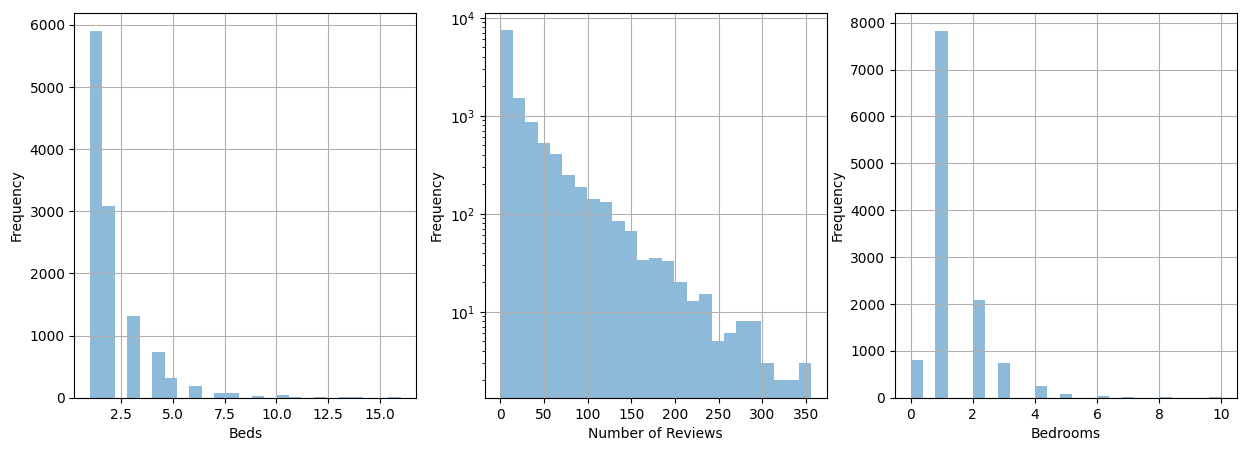

In [110]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
train_data['Beds'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.yscale("log")
plt.xlabel('Beds')

plt.subplot(1,3,2)
train_data['Number of Reviews'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.yscale("log")
plt.xlabel('Number of Reviews')

plt.subplot(1,3,3)
train_data['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bedrooms')

plt.show()


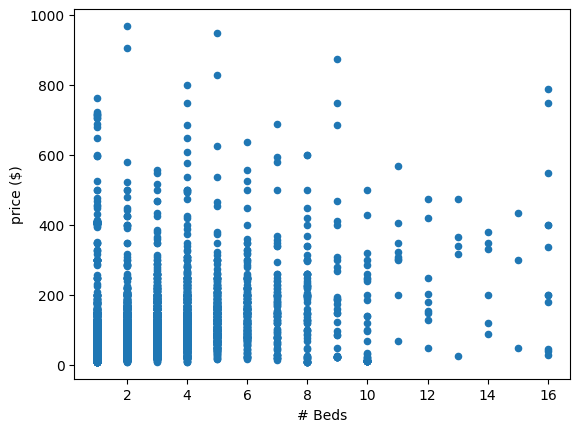

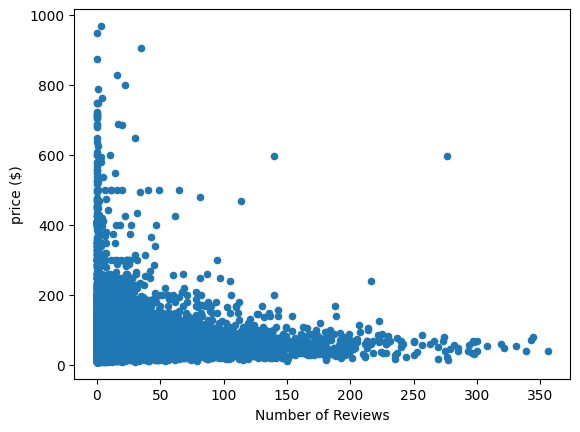

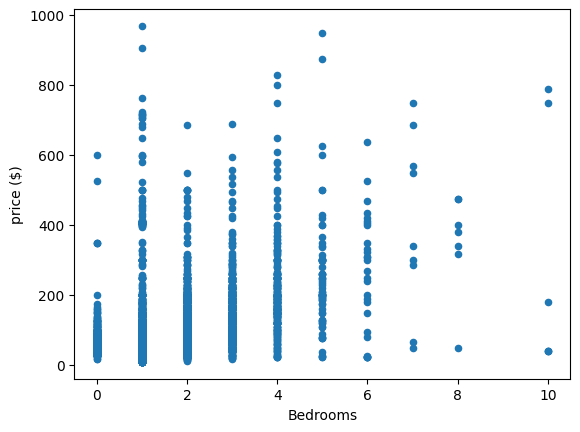

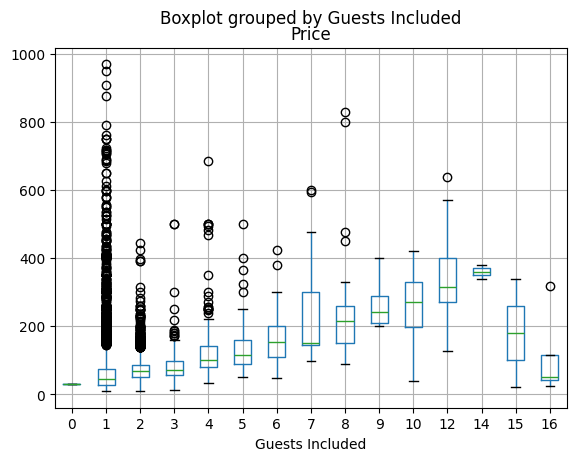

In [85]:
train_data.plot(kind = 'scatter',x='Beds',y = 'Price')
plt.xlabel('# Beds')
plt.ylabel('price ($)')
plt.show()

train_data.plot(kind = 'scatter',x='Number of Reviews',y = 'Price')
plt.xlabel('Number of Reviews')
plt.ylabel('price ($)')
plt.show()

train_data.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('Bedrooms')
plt.ylabel('price ($)')
plt.show()

train_data.boxplot(by='Guests Included',column = 'Price')
plt.show()

Con base en estos gráficos podemos asegurar que existen outliers, si bien son pocos se observa que existen. Cabe mencionar que se observar outliers en el eje X pero también en el eje asociado a precio.

Ahora filtramos por algunos valores.

Text(0, 0.5, 'price ($)')

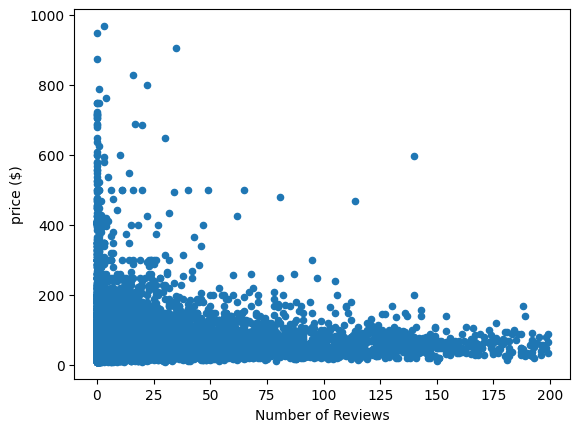

In [86]:
train_data_no_outliers = train_data.loc[train_data['Number of Reviews'] <= 200]

train_data_no_outliers.plot(kind = 'scatter',x='Number of Reviews', y = 'Price')
plt.xlabel('Number of Reviews')
plt.ylabel('price ($)')


Veremos los datos que hemos eliminado

In [87]:
print(
    f'Original: {train_data.shape[0]} // '
    f'Modificado: {train_data_no_outliers.shape[0]}\nDiferencia: {train_data.shape[0] - train_data_no_outliers.shape[0]}'
)
print(f'Variación: {((train_data.shape[0] - train_data_no_outliers.shape[0])/train_data.shape[0])*100:2f}%')

Original: 11824 // Modificado: 11739
Diferencia: 85
Variación: 0.718877%


Luego es posible realizar el filtrado


In [88]:
train_data = train_data.loc[train_data['Number of Reviews'] <= 200]

### Value counts
Otra forma de hacer el estudio y análisis preliminar es a traves de value_counts:

In [89]:
train_data["Bedrooms"].value_counts().sort_index()


Bedrooms
0.0      801
1.0     7764
2.0     2077
3.0      731
4.0      241
5.0       74
6.0       29
7.0        9
8.0        7
10.0       6
Name: count, dtype: int64

## Correlación

Ahora comenzamos el análisis de correlación

In [90]:
train_data.corr()

Host Response Rate  Host Listings Count  \
Host Response Rate                         1.000000            -0.022445   
Host Listings Count                       -0.022445             1.000000   
Host Total Listings Count                 -0.022445             1.000000   
Latitude                                  -0.018761             0.002958   
Longitude                                  0.009980             0.048781   
Accommodates                               0.040284             0.227490   
Bathrooms                                 -0.027922             0.229184   
Bedrooms                                   0.008443             0.182245   
Beds                                       0.025196             0.171891   
Price                                      0.004932             0.230232   
Guests Included                            0.049049             0.073580   
Extra People                               0.019860             0.009722   
Minimum Nights                             0.011780             0.022972   
Maximum Nights                             0.001148             0.004949   
Availability 30                           -0.132984            -0.021292   
Availability 60                           -0.122702            -0.049835   
Availability 90                           -0.115837            -0.063911   
Availability 365                          -0.055000             0.001596   
Number of Reviews                          0.105107            -0.125898   
Review Scores Rating                       0.038074            -0.058627   
Review Scores Accuracy                     0.036554            -0.044878   
Review Scores Cleanliness                  0.047587            -0.001872   
Review Scores Checkin                      0.056571            -0.148241   
Review Scores Communication                0.050856            -0.128694   
Review Scores Location                     0.014983            -0.000240   
Review Scores Value                        0.036631            -0.049020   
Calculated host listings count            -0.041845             0.919134   
Reviews per Month                          0.135789            -0.140670   
le_Last Scraped                           -0.003031            -0.135187   
le_Experiences Offered                     0.010420             0.001980   
le_Host Name                              -0.007509             0.009388   
le_Host Since                             -0.026189            -0.052843   
le_Host Location                          -0.015314            -0.100875   
le_Host About                             -0.059486            -0.236912   
le_Host Response Time                      0.560246            -0.061144   
le_Host Acceptance Rate                    0.014740             0.015483   
le_Host Neighbourhood                     -0.060020            -0.008332   
le_Host Verifications                      0.021879             0.130459   
le_Street                                 -0.019358            -0.010935   
le_Neighbourhood                          -0.031638            -0.006260   
le_Neighbourhood Cleansed                  0.020061             0.069339   
le_Neighbourhood Group Cleansed           -0.023521             0.078535   
le_City                                   -0.020680            -0.187660   
le_State                                  -0.020173            -0.089344   
le_Zipcode                                -0.023486            -0.266037   
le_Market                                 -0.005311            -0.169705   
le_Smart Location                         -0.021500            -0.196982   
le_Country Code                           -0.002841            -0.030084   
le_Country                                 0.008518             0.015547   
le_Property Type                          -0.008304             0.014558   
le_Room Type                              -0.059843            -0.156848   
le_Bed Type                               -0.008441             0.019270   
le_Am

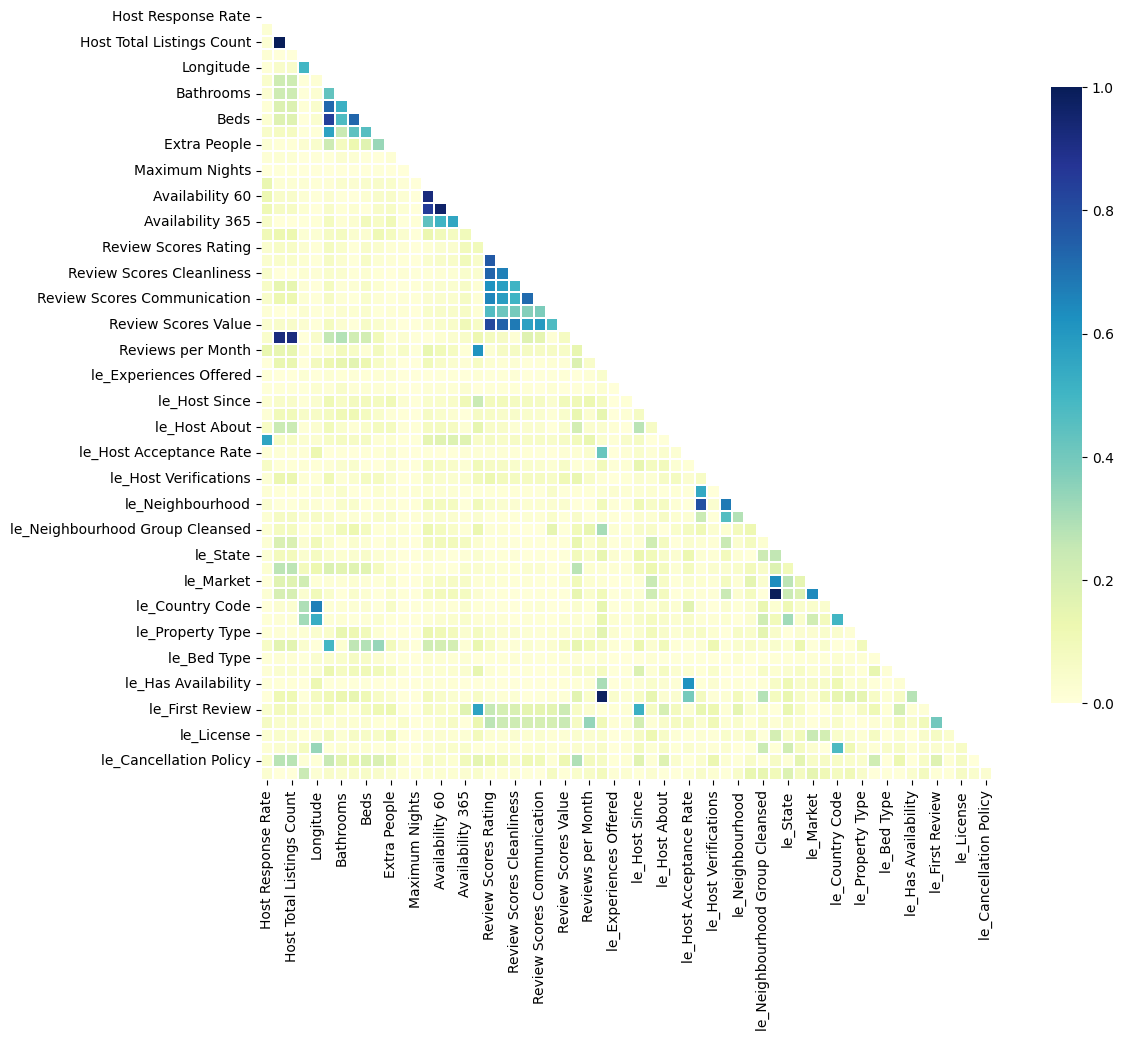

In [91]:
import seaborn as sns

def matriz_correlacion():
    # Compute the correlation matrix
    corr = np.abs(train_data.drop(['Price'], axis=1).corr())

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 10))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
                linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

    plt.show()

matriz_correlacion()

El gráfico anterior permite observar que hay variables fuertemente correlacionadas(los triángulos en color verde-azulado).
Por dar un ejemplo las variables Bedrooms y Beds están fuertemente relacionadas. De la misma manera Availability 30 y Availability 365. Podremos quedarnos con sólo una variable de cada grupo.



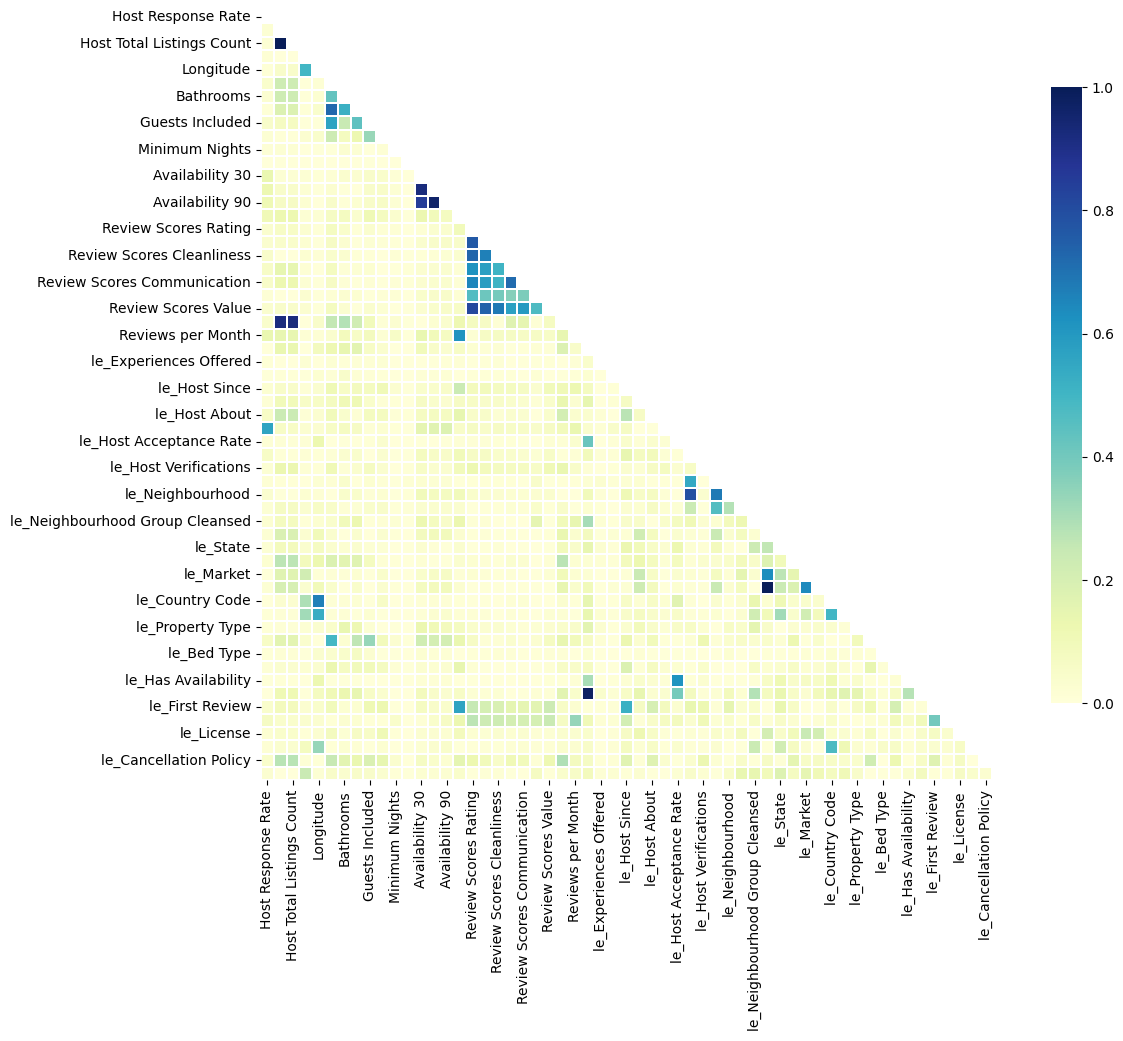

In [92]:

for variable in ['Beds', 'Availability 365']:
    train_data = train_data.drop(variable, axis='columns')
    test_data = test_data.drop(variable, axis='columns')

matriz_correlacion()

A continuación veremos la matriz de scatter plots permitiendo la visualización de la relación entre cada una de las variables del dataset de pruebas.

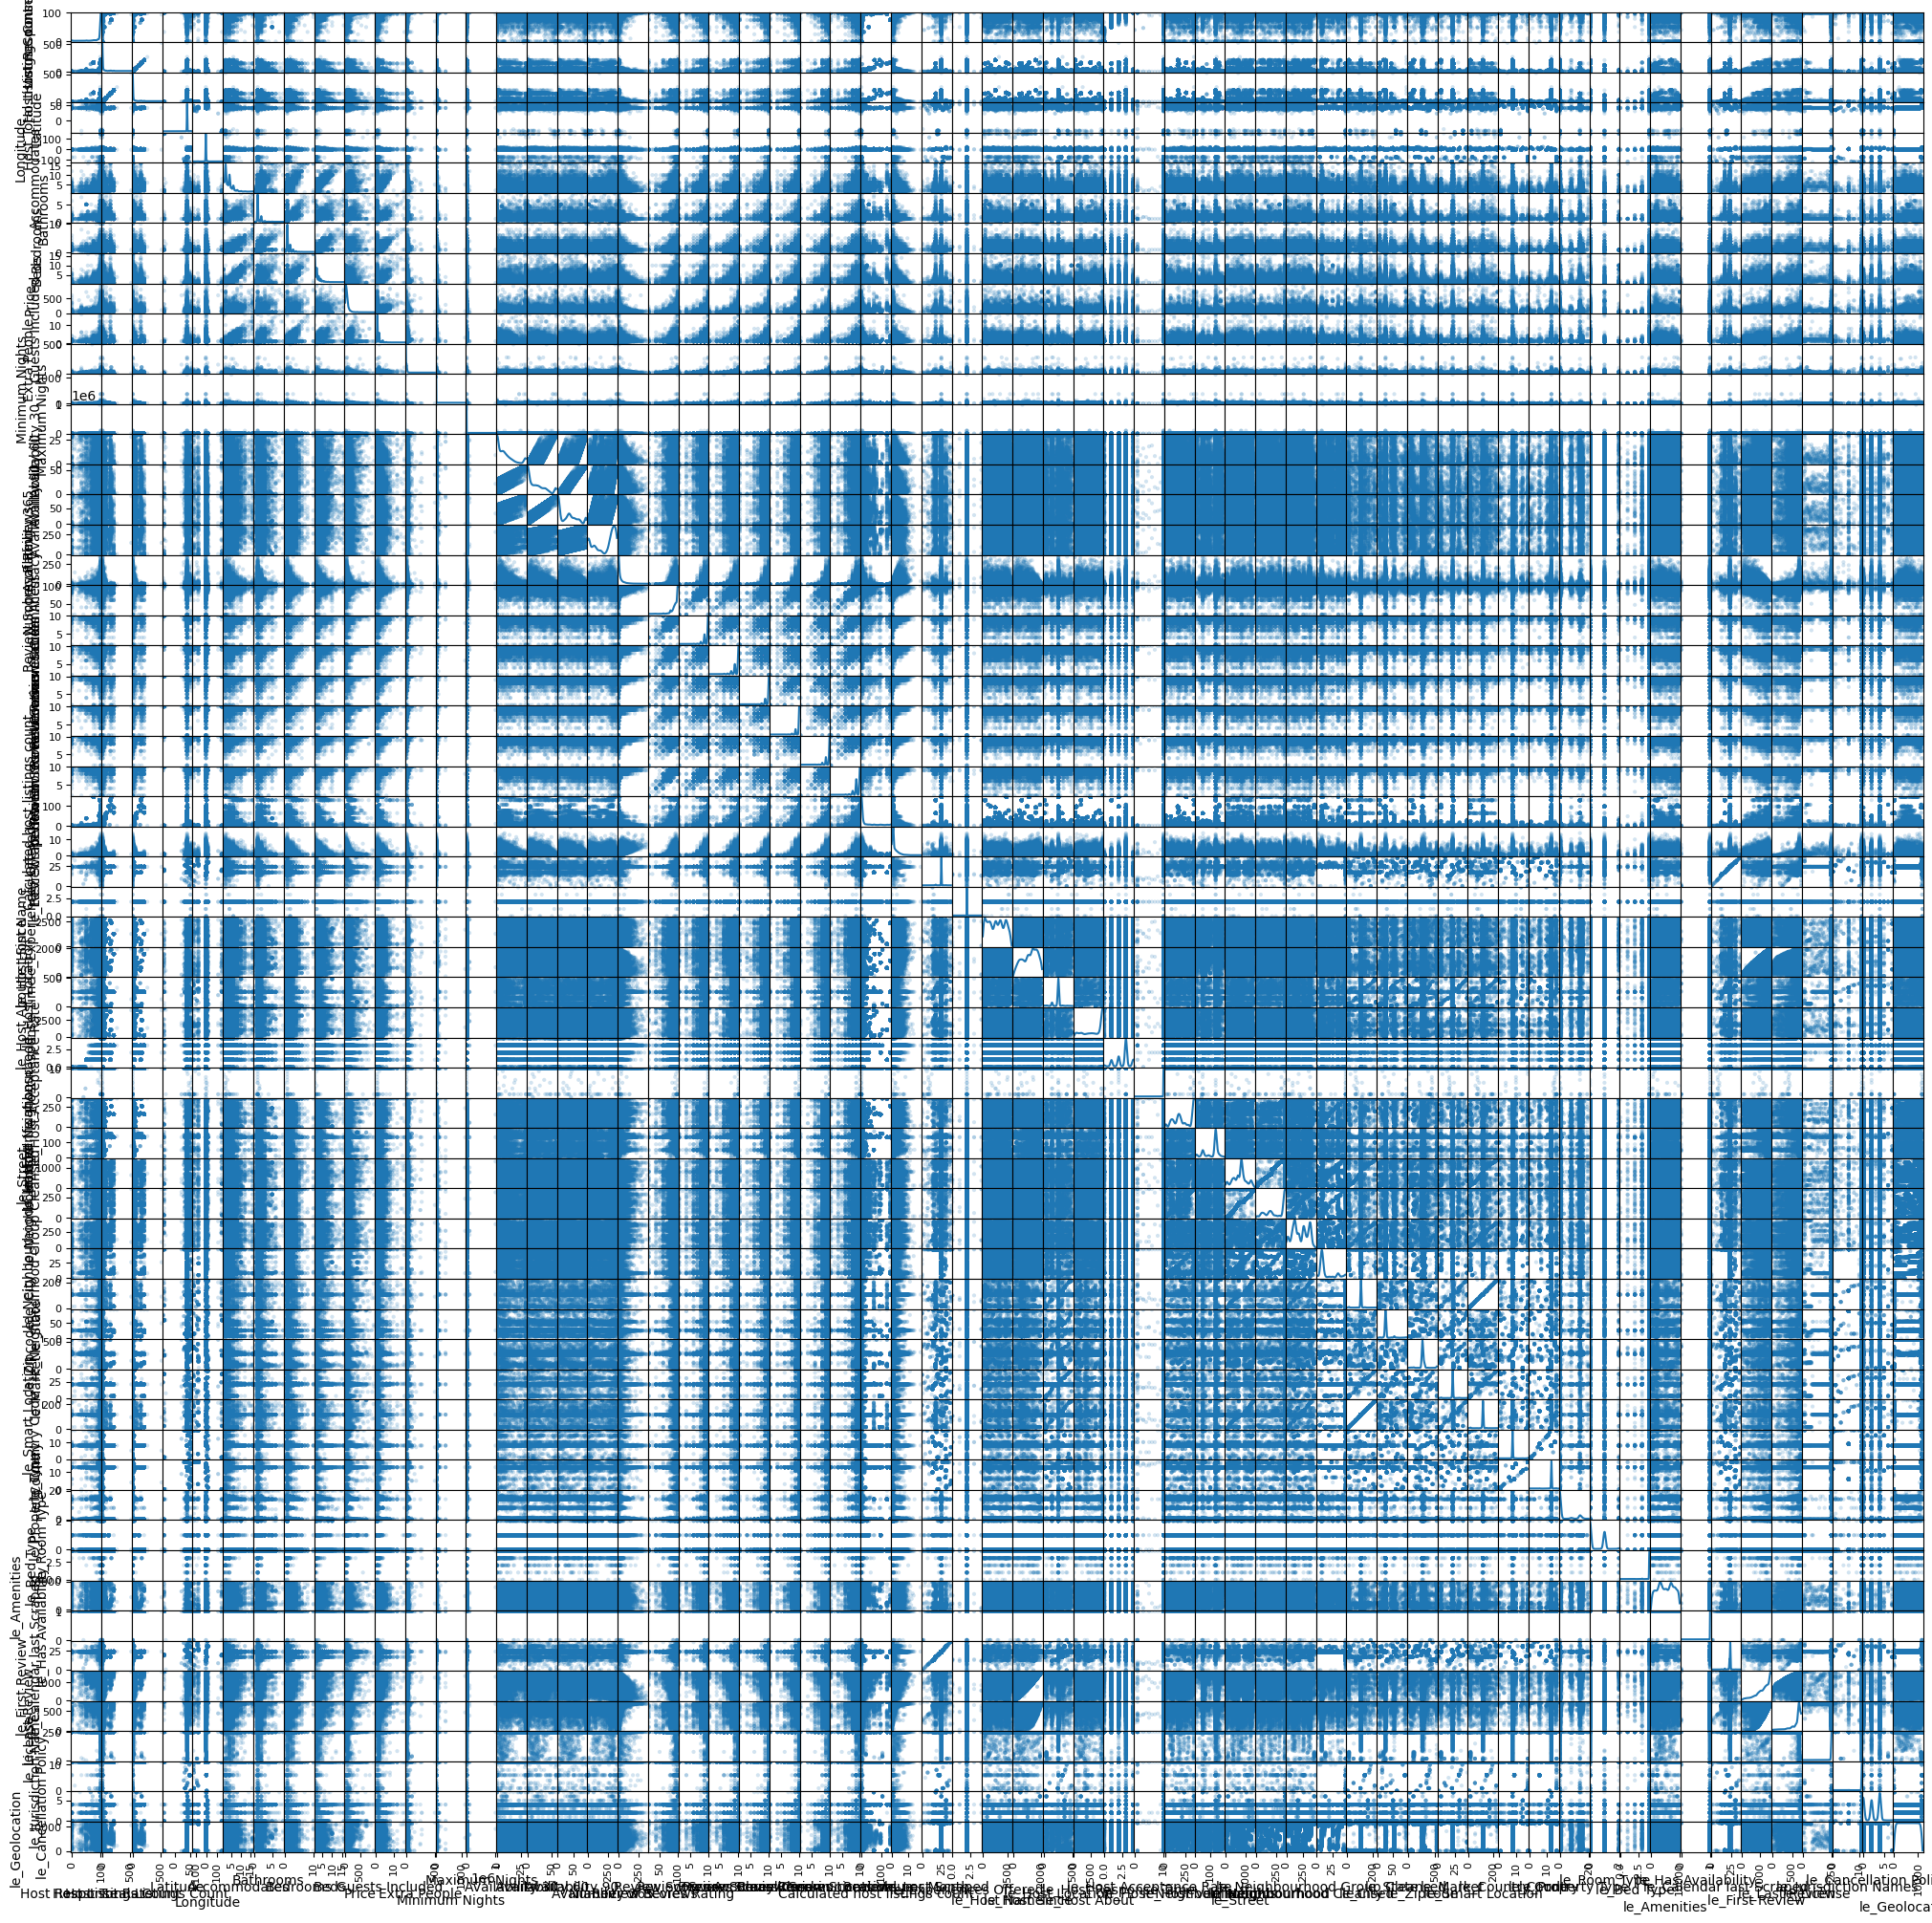

In [111]:
pd.plotting.scatter_matrix(train_data, alpha=0.2, figsize=(25, 25), diagonal = 'kde')
plt.show()

Ahora construiremos nuevas variables.

In [123]:
train_data['bedrooms_squared'] = train_data['Bedrooms'].apply(lambda x: x**2)
train_data['diff_nigths'] = train_data['Maximum Nights'] - train_data['Minimum Nights']

test_data['bedrooms_squared'] = test_data['Bedrooms'].apply(lambda x: x**2)
test_data['diff_nigths'] = test_data['Maximum Nights'] - test_data['Minimum Nights'] 

In [124]:
train_data.head(5).T

0            1            2  \
Host Response Rate                100.000000   100.000000   100.000000   
Host Listings Count                 2.000000     1.000000    16.000000   
Host Total Listings Count           2.000000     1.000000    16.000000   
Latitude                           40.407732    40.415802    40.389048   
Longitude                          -3.684819    -3.705340    -3.740374   
Accommodates                        4.000000     4.000000     1.000000   
Bathrooms                           1.000000     1.000000     1.500000   
Bedrooms                            1.000000     1.000000     1.000000   
Beds                                2.000000     2.000000     8.000000   
Price                              60.000000    50.000000    10.000000   
Guests Included                     1.000000     1.000000     1.000000   
Extra People                        0.000000     0.000000     0.000000   
Minimum Nights                      2.000000     1.000000     3.000000   
Maximum Nights                   1125.000000  1125.000000    30.000000   
Availability 30                     9.000000    15.000000    14.000000   
Availability 60                    32.000000    39.000000    44.000000   
Availability 90                    52.000000    64.000000    74.000000   
Availability 365                  117.000000   208.000000   140.000000   
Number of Reviews                  12.000000    20.000000     0.000000   
Review Scores Rating               95.000000    91.000000   100.000000   
Review Scores Accuracy              9.000000     9.000000    10.000000   
Review Scores Cleanliness          10.000000     9.000000    10.000000   
Review Scores Checkin              10.000000    10.000000    10.000000   
Review Scores Communication        10.000000    10.000000    10.000000   
Review Scores Location             10.000000    10.000000    10.000000   
Review Scores Value                 9.000000    10.000000    10.000000   
Calculated host listings count      2.000000     1.000000    16.000000   
Reviews per Month                   0.500000     2.430000     1.000000   
le_Last Scraped                    24.000000    24.000000    24.000000   
le_Experiences Offered              2.000000     2.000000     2.000000   
le_Host Name                     1135.000000   263.000000  2915.000000   
le_Host Since                    1326.000000  1788.000000  1783.000000   
le_Host Location                   36.000000   255.000000   255.000000   
le_Host About                    4248.000000  2976.000000  2685.000000   
le_Host Response Time               2.000000     3.000000     3.000000   
le_Host Acceptance Rate            10.000000    10.000000    10.000000   
le_Host Neighbourhood             154.000000   353.000000    50.000000   
le_Host Verifications             157.000000   140.000000    30.000000   
le_Street                         585.000000   779.000000   241.000000   
le_Neighbourhood                  150.000000   351.000000    46.000000   
le_Neighbourhood Cleansed         189.000000   345.000000   390.000000   
le_Neighbourhood Group Cleansed    34.000000     8.000000     7.000000   
le_City                           106.000000   106.000000   106.000000   
le_State                           26.000000    26.000000    26.000000   
le_Zipcode                        274.000000   272.000000   286.000000   
le_Market                          21.000000    21.000000    21.000000   
le_Smart Location                 115.000000   115.000000   115.000000   
le_Country Code                     8.000000     8.000000     8.000000   
le_Country                         13.000000    13.000000    13.000000   
le_Property Type                    0.000000     0.000000     0.000000   
le_Room Type                        0.000000     0.000000     2.000000   
le_Bed Type                         4.000000     4.000000     4.000000   
le_Amenities                     3051.000000  3459.000000  1147.000000   
le_Has Availability                 1.000000   

### Modelado: Cross validation

In [125]:
from sklearn import preprocessing

# Dataset de train
y_train = train_data.loc[:, train_data.columns == 'Price'].values     # nos quedamos con la 1ª columna, price
X_train = train_data.loc[:, train_data.columns != 'Price'].values      # nos quedamos con el resto

# Dataset de test
y_test = test_data.loc[:, test_data.columns == 'Price'].values     # nos quedamos con la 1ª columna, price
X_test = test_data.loc[:, test_data.columns != 'Price'].values     # nos quedamos con el resto


In [126]:

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test)

print('Datos entrenamiento: ', XtrainScaled.shape)
print('Datos test: ', XtestScaled.shape)

Datos entrenamiento:  (11824, 62)
Datos test:  (2956, 62)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ..........................................alpha=0.1; total time=   0.5s
[CV] END ..........................................alpha=0.1; total time=   0.2s
[CV] END ..........................................alpha=0.1; total time=   0.3s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END .............................alpha=5.45559478116852; total time=   0.0s
[CV] END .............................alpha=5.45559478116852; total time=   0.0s
[CV] END .............................alpha=5.45

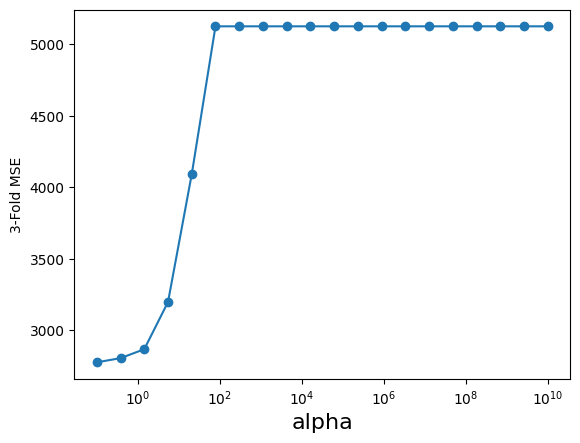

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 3, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
plt.show()

Ahora mostraremos el detalle del error menor.

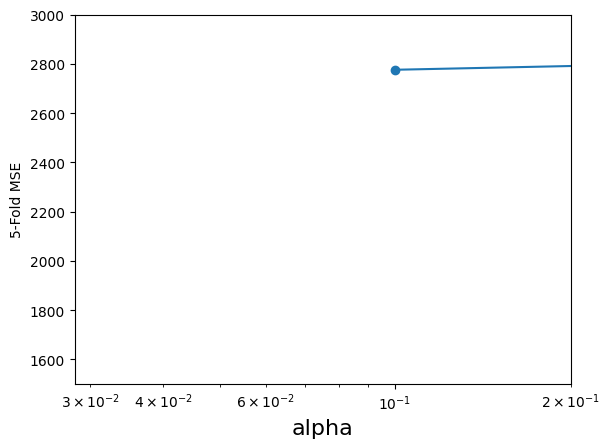

In [129]:
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.xlim(0, 0.2)
plt.ylim(1500, 3000)
plt.show()

Ahora ejecutaremos Lasso utilizando el alpha óptimo del paso anterior:

In [130]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = train_data.columns[1:] # es igual en train y en test

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 2.67e+03
MSE Modelo Lasso (test) : 5.83e+03
RMSE Modelo Lasso (train): 51.7
RMSE Modelo Lasso (test) : 76.3
Host Listings Count -0.5767984922558745
Host Total Listings Count 10.236151863055616
Latitude 0.0
Longitude -5.955354473199577
Accommodates -1.1115280952614615
Bathrooms 19.50447852264074
Bedrooms 10.700629585588388
Beds 6.107136409144567
Price -3.7614338744957183
Guests Included -0.3867015321541505
Extra People -2.28967546678203
Minimum Nights 0.40156925860450854
Maximum Nights -0.0
Availability 30 11.560172120785387
Availability 60 -0.0
Availability 90 -2.685329201517372
Availability 365 1.2423321181627855
Number of Reviews 0.7607580915019676
Review Scores Rating 4.965067559177517
Review Scores Accuracy 1.231055808930808
Review Scores Cleanliness 2.222409155498331
Review Scores Checkin -0.7407184681510314
Review Scores Communication -1.0101513839451042
Review Scores Location 4.55591933138897
Review Scores Value -2.4044240301622235
Calculated host listi

Se observa que Lasso permite desactivar algunas variables como por ejemplo Latitude, sin embargo el modelo no es aún bueno ya que existen valores negativos asociados a algunas varibales como el caso de _Guests Include_ y _Accomodates_